In [1]:
import matplotlib.pyplot as plt
import numpy as np
import flet as ft
import os
import base64
from pylsl import StreamInlet, resolve_stream
from scipy.signal import welch, spectrogram
import pyxdf
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from joblib import dump

Authorization classes are not loaded, using fake implementations.


In [2]:
import pyxdf
import os
import numpy as np

def concat_data(frequency):
    # โฟลเดอร์ที่เก็บข้อมูล
    data_folder = f'../SSVEP_data/{frequency}'

    # เก็บข้อมูลจากทุกไฟล์ในโฟลเดอร์
    all_data = []
    for file_name in os.listdir(data_folder):
        file_path = os.path.join(data_folder, file_name)
        streams, _ = pyxdf.load_xdf(file_path)
        raw_data = streams[0]["time_series"].T
        all_data.append(raw_data)

    # แปลงเป็น NumPy array และรวมข้อมูลด้วย np.concatenate
    all_data_array = np.concatenate(all_data, axis=1)

    return all_data_array


In [3]:
raw_data1 = concat_data('6Hz')
print(raw_data1.shape)
raw_data2 = concat_data('20Hz')
print(raw_data2.shape)
raw_data3 = concat_data('0Hz')
print(raw_data3.shape)

(8, 159670)
(8, 177500)
(8, 152760)


In [4]:
# streams1, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/6Hz/6hz_1')
# raw_data1 = streams1[0]["time_series"].T #From Steam variable this query is EEG data
# print(raw_data1.shape)

# streams2, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/20Hz/20hz_1')
# raw_data2 = streams2[0]["time_series"].T #From Steam variable this query is EEG data

# streams3, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/0Hz/0hz_1')
# raw_data3 = streams3[0]["time_series"].T #From Steam variable this query is EEG data

In [5]:
data1 = raw_data1[0:4,:]
data2 = raw_data2[0:4,:]
data3 = raw_data3[0:4,:]

In [6]:
data1_oz = data1[0] - data1[1]
data1_o1 = data1[2] - data1[1]
data1_o2 = data1[3] - data1[1]
print(len(data1_o1))
data2_oz = data2[0] - data2[1]
data2_o1 = data2[2] - data2[1]
data2_o2 = data2[3] - data2[1]
print(len(data2_o1))
data3_oz = data3[0] - data3[1]
data3_o1 = data3[2] - data3[1]
data3_o2 = data3[3] - data3[1]
print(len(data3_o1))

159670
177500
152760


In [7]:
def create_overlapping_sets(data, set_size=500, overlap_fraction=0.5):
    step = int(set_size * (1 - overlap_fraction))
    sets = []
    for i in range(0, len(data) - set_size + 1, step):
        sets.append(data[i:i + set_size])
    return sets

In [8]:
data1_set_oz = create_overlapping_sets(data1_oz, set_size=1000, overlap_fraction=0.5)
data1_set_o1 = create_overlapping_sets(data1_o1, set_size=1000, overlap_fraction=0.5)
data1_set_o2 = create_overlapping_sets(data1_o2, set_size=1000, overlap_fraction=0.5)

In [9]:
data2_set_oz = create_overlapping_sets(data2_oz, set_size=1000, overlap_fraction=0.5)
data2_set_o1 = create_overlapping_sets(data2_o1, set_size=1000, overlap_fraction=0.5)
data2_set_o2 = create_overlapping_sets(data2_o2, set_size=1000, overlap_fraction=0.5)

In [10]:
data3_set_oz = create_overlapping_sets(data3_oz, set_size=1000, overlap_fraction=0.5)
data3_set_o1 = create_overlapping_sets(data3_o1, set_size=1000, overlap_fraction=0.5)
data3_set_o2 = create_overlapping_sets(data3_o2, set_size=1000, overlap_fraction=0.5)

In [11]:
print(len(data1_set_oz))
print(len(data2_set_oz))
print(len(data3_set_oz))


318
354
304


In [12]:
# f, Pxx = welch(data_oz, fs=250, nperseg= 250*4)

In [13]:
data1_fft_oz = []
data1_fft_o1 = []
data1_fft_o2 = []
for i in range(len(data1_set_oz)):
    f, Pxx = welch(data1_set_oz[i], fs=250, nperseg= 250*4)
    data1_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data1_set_o1[i], fs=250, nperseg= 250*4)
    data1_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data1_set_o2[i], fs=250, nperseg= 250*4)
    data1_fft_o2.append(Pxx[0:121])


In [14]:
print(f[0:121])

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.  ]


In [15]:
data2_fft_oz = []
data2_fft_o1 = []
data2_fft_o2 = []
for i in range(len(data2_set_oz)):
    f, Pxx = welch(data2_set_oz[i], fs=250, nperseg= 250*4)
    data2_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data2_set_o1[i], fs=250, nperseg= 250*4)
    data2_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data2_set_o2[i], fs=250, nperseg= 250*4)
    data2_fft_o2.append(Pxx[0:121])

In [16]:
data3_fft_oz = []
data3_fft_o1 = []
data3_fft_o2 = []
for i in range(len(data3_set_oz)):
    f, Pxx = welch(data3_set_oz[i], fs=250, nperseg= 250*4)
    data3_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data3_set_o1[i], fs=250, nperseg= 250*4)
    data3_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data3_set_o2[i], fs=250, nperseg= 250*4)
    data3_fft_o2.append(Pxx[0:121])

In [17]:
# Pxx

In [18]:
# data3_fft_oz = np.array(data3_fft_oz)
# data3_fft_o1 = np.array(data3_fft_o1)
# data3_fft_o2 = np.array(data3_fft_o2)
# print(data3_fft_o2.shape)

c:\ProgramData\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



(976, 363)


C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


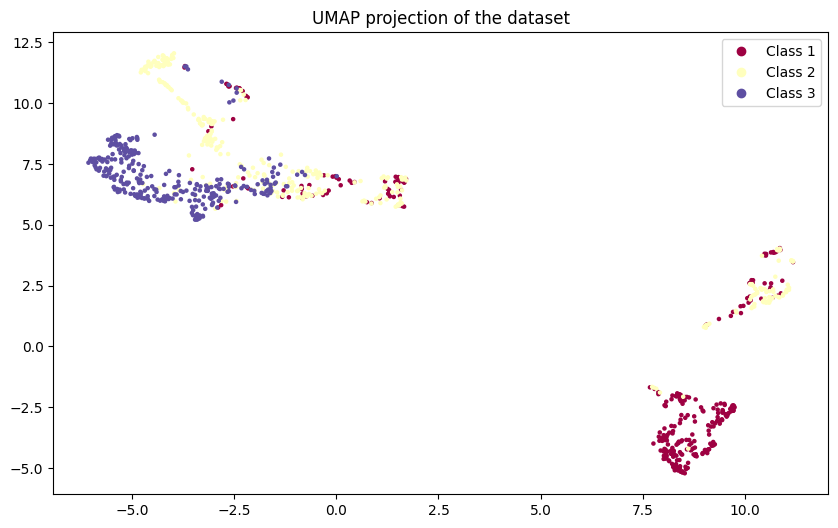

In [19]:
import umap
# รวมข้อมูลจากทุก feature สำหรับแต่ละ class และ flatten ข้อมูล
combined_data1 = np.hstack((data1_fft_oz, data1_fft_o1, data1_fft_o2))
combined_data2 = np.hstack((data2_fft_oz, data2_fft_o1, data2_fft_o2))
combined_data3 = np.hstack((data3_fft_oz, data3_fft_o1, data3_fft_o2))

# รวมข้อมูลจากทุก class เข้าด้วยกัน
combined_data = np.vstack((combined_data1, combined_data2, combined_data3))

# ตรวจสอบว่าข้อมูลมีขนาดที่ถูกต้อง
print(combined_data.shape)  # ควรได้ (จำนวน samples ทั้งหมด, จำนวน features)

# สร้าง label สำหรับแต่ละ class
labels = np.array([0]*len(data1_fft_oz) + [1]*len(data2_fft_oz) + [2]*len(data3_fft_oz))

# ทำ UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors = 50)
embedding = reducer.fit_transform(combined_data)

# แสดงผลการลดมิติ
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'])
plt.title('UMAP projection of the dataset')
plt.show()

In [20]:
print(combined_data.shape)
print(labels)

(976, 363)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_rf = rf_classifier.predict(X_test)

precision_lda_per_class = precision_score(y_test, y_pred_rf, average=None)
recall_lda_per_class = recall_score(y_test, y_pred_rf, average=None)
f1_lda_per_class = f1_score(y_test, y_pred_rf, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lda_per_class = []
for class_label in range(len(precision_lda_per_class)):
    correct_predictions = ((y_pred_rf == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_rf == class_label).sum()
    # print(y_pred_rf)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lda_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lda = accuracy_score(y_test, y_pred_rf)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lda = precision_score(y_test, y_pred_rf, average='weighted')
avg_recall_lda = recall_score(y_test, y_pred_rf, average='weighted')
avg_f1_lda = f1_score(y_test, y_pred_rf, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame({
    'Class': range(len(precision_lda_per_class)),
    'Precision': precision_lda_per_class,
    'Recall': recall_lda_per_class,
    'F1-score': f1_lda_per_class,
    'Accuracy': accuracy_lda_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_df.loc['average'] = [None, avg_precision_lda, avg_recall_lda, avg_f1_lda, avg_accuracy_lda]

print(results_df)
dump(rf_classifier, 'model/random_forest_model.joblib')


         Class  Precision    Recall  F1-score  Accuracy
0          0.0   1.000000  0.983607  0.991736  1.000000
1          1.0   0.987179  1.000000  0.993548  0.987179
2          2.0   1.000000  1.000000  1.000000  1.000000
average    NaN   0.994963  0.994898  0.994893  0.994898


['model/random_forest_model.joblib']

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล SVM 'poly' 'linear' 'rbf'
svm_classifier = SVC(C=0.1, gamma=1, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_svm = svm_classifier.predict(X_test)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_lda_per_class = precision_score(y_test, y_pred_svm, average=None)
recall_lda_per_class = recall_score(y_test, y_pred_svm, average=None)
f1_lda_per_class = f1_score(y_test, y_pred_svm, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lda_per_class = []
for class_label in range(len(precision_lda_per_class)):
    correct_predictions = ((y_pred_svm == class_label) & (y_test == class_label)).sum()
    # print(y_test)
    total_predictions = (y_pred_svm == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lda_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lda = accuracy_score(y_test, y_pred_svm)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lda = precision_score(y_test, y_pred_svm, average='weighted')
avg_recall_lda = recall_score(y_test, y_pred_svm, average='weighted')
avg_f1_lda = f1_score(y_test, y_pred_svm, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame({
    'Class': range(len(precision_lda_per_class)),
    'Precision': precision_lda_per_class,
    'Recall': recall_lda_per_class,
    'F1-score': f1_lda_per_class,
    'Accuracy': accuracy_lda_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_df.loc['average'] = [None, avg_precision_lda, avg_recall_lda, avg_f1_lda, avg_accuracy_lda]

print(results_df)
dump(svm_classifier, 'model/svm_model.joblib')

         Class  Precision    Recall  F1-score  Accuracy
0          0.0   0.800000  0.852459  0.825397  0.800000
1          1.0   0.863014  0.818182  0.840000  0.863014
2          2.0   0.982759  0.982759  0.982759  0.982759
average    NaN   0.878837  0.877551  0.877700  0.877551


['model/svm_model.joblib']

In [23]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score

# # แบ่งข้อมูลเป็น train set และ test set
# X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# # กำหนดช่วงของ hyperparameters ที่ต้องการทดสอบ
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # regularization parameter
#     'gamma': [1, 0.1, 0.01, 0.001],  # kernel coefficient
#     'kernel': ['rbf', 'linear', 'poly']  # kernel function
# }

# # สร้าง GridSearchCV object
# grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# # ฝึกโมเดล
# grid_search.fit(X_train, y_train)

# # แสดง hyperparameters ที่ดีที่สุด
# print("Best hyperparameters:", grid_search.best_params_)

# # ทำนายบน test set
# y_pred_svm = grid_search.best_estimator_.predict(X_test)

# # ประเมินประสิทธิภาพของโมเดล SVM ที่ปรับ hyperparameters แล้ว
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("SVM Accuracy:", accuracy_svm)


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล LDA
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_lda = lda_classifier.predict(X_test)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_lda_per_class = precision_score(y_test, y_pred_lda, average=None)
recall_lda_per_class = recall_score(y_test, y_pred_lda, average=None)
f1_lda_per_class = f1_score(y_test, y_pred_lda, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lda_per_class = []
for class_label in range(len(precision_lda_per_class)):
    correct_predictions = ((y_pred_lda == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_lda == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lda_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lda = accuracy_score(y_test, y_pred_lda)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
avg_recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
avg_f1_lda = f1_score(y_test, y_pred_lda, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame({
    'Class': range(len(precision_lda_per_class)),
    'Precision': precision_lda_per_class,
    'Recall': recall_lda_per_class,
    'F1-score': f1_lda_per_class,
    'Accuracy': accuracy_lda_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_df.loc['average'] = [None, avg_precision_lda, avg_recall_lda, avg_f1_lda, avg_accuracy_lda]

print(results_df)
conf_matrix_svm = confusion_matrix(y_test, y_pred_lda)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)
dump(lda_classifier, 'model/lda_model.joblib')

         Class  Precision    Recall  F1-score  Accuracy
0          0.0   1.000000  0.967213  0.983333  1.000000
1          1.0   0.986301  0.935065  0.960000  0.986301
2          2.0   0.906250  1.000000  0.950820  0.906250
average    NaN   0.966876  0.964286  0.964545  0.964286
SVM Confusion Matrix:
[[59  1  1]
 [ 0 72  5]
 [ 0  0 58]]


['model/lda_model.joblib']

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# สร้างและฝึกโมเดล KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_knn = knn_classifier.predict(X_test)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_knn_per_class = precision_score(y_test, y_pred_knn, average=None)
recall_knn_per_class = recall_score(y_test, y_pred_knn, average=None)
f1_knn_per_class = f1_score(y_test, y_pred_knn, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_knn_per_class = []
for class_label in range(len(precision_knn_per_class)):
    correct_predictions = ((y_pred_knn == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_knn == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_knn_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
avg_recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
avg_f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_knn_df = pd.DataFrame({
    'Class': range(len(precision_knn_per_class)),
    'Precision': precision_knn_per_class,
    'Recall': recall_knn_per_class,
    'F1-score': f1_knn_per_class,
    'Accuracy': accuracy_knn_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_knn_df.loc['average'] = [None, avg_precision_knn, avg_recall_knn, avg_f1_knn, avg_accuracy_knn]

print(results_knn_df)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
dump(knn_classifier, 'model/knn_model.joblib')


         Class  Precision    Recall  F1-score  Accuracy
0          0.0   0.784615  0.836066  0.809524  0.784615
1          1.0   0.828571  0.753247  0.789116  0.828571
2          2.0   0.868852  0.913793  0.890756  0.868852
average    NaN   0.826811  0.826531  0.825545  0.826531
KNN Confusion Matrix:
[[51  8  2]
 [13 58  6]
 [ 1  4 53]]


['model/knn_model.joblib']

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# แปลง y_train และ y_test ให้เป็นแบบ one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# สร้างโมเดล ANN แบบ Feed-Forward
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(num_classes, activation='softmax'))

# คอมไพล์โมเดล
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ฝึกโมเดล
ann_model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, verbose=1)

# ทำนายบน test set
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_ann_per_class = precision_score(y_test, y_pred_ann, average=None)
recall_ann_per_class = recall_score(y_test, y_pred_ann, average=None)
f1_ann_per_class = f1_score(y_test, y_pred_ann, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_ann_per_class = []
for class_label in range(len(precision_ann_per_class)):
    correct_predictions = ((y_pred_ann == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_ann == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_ann_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_ann = accuracy_score(y_test, y_pred_ann)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
avg_recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
avg_f1_ann = f1_score(y_test, y_pred_ann, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_ann_df = pd.DataFrame({
    'Class': range(len(precision_ann_per_class)),
    'Precision': precision_ann_per_class,
    'Recall': recall_ann_per_class,
    'F1-score': f1_ann_per_class,
    'Accuracy': accuracy_ann_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_ann_df.loc['average'] = [None, avg_precision_ann, avg_recall_ann, avg_f1_ann, avg_accuracy_ann]

print(results_ann_df)
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("ANN Confusion Matrix:")
print(conf_matrix_ann)




Epoch 1/50


25/25 [==============================] - 1s 3ms/step - loss: 375693472.0000 - accuracy: 0.5077
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 5436003.5000 - accuracy: 0.6987
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 7622.1025 - accuracy: 0.7654
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 5359.8931 - accuracy: 0.7987
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 1099.7253 - accuracy: 0.8192
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 2100.5713 - accuracy: 0.8077
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 117.0654 - accuracy: 0.8167
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 459.3702 - accuracy: 0.8244
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 436.6971 - accuracy: 0.8423
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 100.7159 

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dense, ReLU, Softmax, Flatten
from tensorflow.keras.utils import to_categorical

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# Normalize ข้อมูล
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ปรับข้อมูลให้เป็นรูปแบบ 3D สำหรับ Conv1D
X_train_reshaped = X_train.reshape(-1, 363, 1)
X_test_reshaped = X_test.reshape(-1, 363, 1)

# สร้างโมเดล CNN สำหรับข้อมูล 1D
model = Sequential()

# Convolution Layer
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(363, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(ReLU())

# เพิ่มอีก Convolution Layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(ReLU())

# Dense Layer
model.add(Flatten())
model.add(Dense(units=256))
model.add(ReLU())

# Output Layer
num_classes = len(np.unique(y_train))
model.add(Dense(units=num_classes))
model.add(Softmax())

# คอมไพล์โมเดล
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# แปลง y_train และ y_test ให้เป็นแบบ one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# ฝึกโมเดล
model.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=32, verbose=1)

# ทำนายบน test set
y_pred_cnn = np.argmax(model.predict(X_test_reshaped), axis=1)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_cnn_per_class = precision_score(y_test, y_pred_cnn, average=None)
recall_cnn_per_class = recall_score(y_test, y_pred_cnn, average=None)
f1_cnn_per_class = f1_score(y_test, y_pred_cnn, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_cnn_per_class = []
for class_label in range(len(precision_cnn_per_class)):
    correct_predictions = ((y_pred_cnn == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_cnn == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_cnn_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_cnn = accuracy_score(y_test, y_pred_cnn)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
avg_recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
avg_f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_cnn_df = pd.DataFrame({
    'Class': range(len(precision_cnn_per_class)),
    'Precision': precision_cnn_per_class,
    'Recall': recall_cnn_per_class,
    'F1-score': f1_cnn_per_class,
    'Accuracy': accuracy_cnn_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_cnn_df.loc['average'] = [None, avg_precision_cnn, avg_recall_cnn, avg_f1_cnn, avg_accuracy_cnn]

print(results_cnn_df)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
print("CNN Confusion Matrix:")
print(conf_matrix_cnn)



Epoch 1/100
25/25 [==============================] - 2s 23ms/step - loss: 0.5083 - accuracy: 0.8641
Epoch 2/100
25/25 [==============================] - 1s 23ms/step - loss: 0.3401 - accuracy: 0.9205
Epoch 3/100
25/25 [==============================] - 1s 23ms/step - loss: 0.3010 - accuracy: 0.9628
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 0.2666 - accuracy: 0.9692
Epoch 5/100
25/25 [==============================] - 1s 23ms/step - loss: 0.1510 - accuracy: 0.9667
Epoch 6/100
25/25 [==============================] - 1s 23ms/step - loss: 0.1648 - accuracy: 0.9654
Epoch 7/100
25/25 [==============================] - 1s 22ms/step - loss: 0.2972 - accuracy: 0.9692
Epoch 8/100
25/25 [==============================] - 1s 24ms/step - loss: 0.1221 - accuracy: 0.9795
Epoch 9/100
25/25 [==============================] - 1s 24ms/step - loss: 0.1112 - accuracy: 0.9782
Epoch 10/100
25/25 [==============================] - 1s 24ms/step - loss: 0.1631 - accuracy: 0.979

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# Normalize ข้อมูล
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ปรับข้อมูลให้เป็นรูปแบบ 3D สำหรับ LSTM
X_train_reshaped = X_train.reshape(-1, 363, 1)
X_test_reshaped = X_test.reshape(-1, 363, 1)

# สร้างโมเดล LSTM
model = Sequential()

# LSTM Layer 1
model.add(LSTM(50, return_sequences=True, input_shape=(363, 1), kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))

# LSTM Layer 2
model.add(LSTM(70, return_sequences=False, kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Dense(5, activation='relu'))

# Output Layer with Softmax
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# คอมไพล์โมเดล
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# แปลง y_train และ y_test ให้เป็นแบบ one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(np.unique(y_train)))

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)

# ฝึกโมเดล
model.fit(X_train_reshaped, y_train_one_hot, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_one_hot), callbacks=[reduce_lr], verbose=1)

# ทำนายบน test set
y_pred_lstm = np.argmax(model.predict(X_test_reshaped), axis=1)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_lstm_per_class = precision_score(y_test, y_pred_lstm, average=None)
recall_lstm_per_class = recall_score(y_test, y_pred_lstm, average=None)
f1_lstm_per_class = f1_score(y_test, y_pred_lstm, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lstm_per_class = []
for class_label in range(len(precision_lstm_per_class)):
    correct_predictions = ((y_pred_lstm == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_lstm == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lstm_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lstm = accuracy_score(y_test, y_pred_lstm)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
avg_recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
avg_f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_lstm_df = pd.DataFrame({
    'Class': range(len(precision_lstm_per_class)),
    'Precision': precision_lstm_per_class,
    'Recall': recall_lstm_per_class,
    'F1-score': f1_lstm_per_class,
    'Accuracy': accuracy_lstm_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_lstm_df.loc['average'] = [None, avg_precision_lstm, avg_recall_lstm, avg_f1_lstm, avg_accuracy_lstm]

print(results_lstm_df)
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
print("LSTM Confusion Matrix:")
print(conf_matrix_lstm)


Epoch 1/200
25/25 [==============================] - 9s 216ms/step - loss: 1.1057 - accuracy: 0.3333 - val_loss: 1.1010 - val_accuracy: 0.3827 - lr: 0.0010
Epoch 2/200
25/25 [==============================] - 4s 171ms/step - loss: 1.1032 - accuracy: 0.3564 - val_loss: 1.0991 - val_accuracy: 0.3163 - lr: 0.0010
Epoch 3/200
25/25 [==============================] - 4s 181ms/step - loss: 1.1017 - accuracy: 0.3462 - val_loss: 1.0955 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 4/200
25/25 [==============================] - 4s 176ms/step - loss: 1.1018 - accuracy: 0.3551 - val_loss: 1.0936 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 5/200
25/25 [==============================] - 4s 172ms/step - loss: 1.1004 - accuracy: 0.3551 - val_loss: 1.0943 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 6/200
25/25 [==============================] - 4s 175ms/step - loss: 1.0996 - accuracy: 0.3551 - val_loss: 1.0920 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 7/200
25/25 [==============================] - 4s 172ms/st

C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
streams_test1, header = pyxdf.load_xdf('../flicker/6Hz/6Hz_4')
raw_test1 = streams_test1[0]["time_series"].T #From Steam variable this query is EEG data

streams_test2, header = pyxdf.load_xdf('../flicker/20Hz_10')
raw_test2 = streams_test2[0]["time_series"].T #From Steam variable this query is EEG data

streams_test3, header = pyxdf.load_xdf('../SSVEP_data/0Hz/0hz_10')
raw_test3 = streams_test3[0]["time_series"].T #From Steam variable this query is EEG data



In [30]:
data_test1 = raw_test1[0:4,:]
data_test1_oz = data_test1[0] - data_test1[1]
data_test1_o1 = data_test1[2] - data_test1[1]
data_test1_o2 = data_test1[3] - data_test1[1]
data_test1_set_oz = create_overlapping_sets(data_test1_oz, set_size=1000, overlap_fraction=0.5)
data_test1_set_o1 = create_overlapping_sets(data_test1_o1, set_size=1000, overlap_fraction=0.5)
data_test1_set_o2 = create_overlapping_sets(data_test1_o2, set_size=1000, overlap_fraction=0.5)
data_test1_fft_oz = []
data_test1_fft_o2 = []
data_test1_fft_o1 = []
for i in range(len(data_test1_set_oz)):
    f, Pxx = welch(data_test1_set_oz[i], fs=250, nperseg= 250*4)
    data_test1_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data_test1_set_o1[i], fs=250, nperseg= 250*4)
    data_test1_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data_test1_set_o2[i], fs=250, nperseg= 250*4)
    data_test1_fft_o2.append(Pxx[0:121])

combined_test1 = np.hstack((data_test1_fft_oz, data_test1_fft_o1, data_test1_fft_o2))
# labels_test1 = np.array([0]*len(data_test1_fft_oz))
# print(combined_test1.shape)
# print(labels_test1.shape)
data_test2 = raw_test2[0:4,:]
data_test2_oz = data_test2[0] - data_test2[1]
data_test2_o1 = data_test2[2] - data_test2[1]
data_test2_o2 = data_test2[3] - data_test2[1]
data_test2_set_oz = create_overlapping_sets(data_test2_oz, set_size=1000, overlap_fraction=0.5)
data_test2_set_o1 = create_overlapping_sets(data_test2_o1, set_size=1000, overlap_fraction=0.5)
data_test2_set_o2 = create_overlapping_sets(data_test2_o2, set_size=1000, overlap_fraction=0.5)
data_test2_fft_oz = []
data_test2_fft_o2 = []
data_test2_fft_o1 = []
for i in range(len(data_test2_set_oz)):
    f, Pxx = welch(data_test2_set_oz[i], fs=250, nperseg= 250*4)
    data_test2_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data_test2_set_o1[i], fs=250, nperseg= 250*4)
    data_test2_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data_test2_set_o2[i], fs=250, nperseg= 250*4)
    data_test2_fft_o2.append(Pxx[0:121])

combined_test2 = np.hstack((data_test2_fft_oz, data_test2_fft_o1, data_test2_fft_o2))
# labels_test2 = np.array([0]*len(data_test2_fft_oz))
# print(combined_test2.shape)
# print(labels_test2.shape)

data_test3 = raw_test3[0:4,:]
data_test3_oz = data_test3[0] - data_test3[1]
data_test3_o1 = data_test3[2] - data_test3[1]
data_test3_o2 = data_test3[3] - data_test3[1]
data_test3_set_oz = create_overlapping_sets(data_test3_oz, set_size=1000, overlap_fraction=0.5)
data_test3_set_o1 = create_overlapping_sets(data_test3_o1, set_size=1000, overlap_fraction=0.5)
data_test3_set_o2 = create_overlapping_sets(data_test3_o2, set_size=1000, overlap_fraction=0.5)
data_test3_fft_oz = []
data_test3_fft_o2 = []
data_test3_fft_o1 = []
for i in range(len(data_test3_set_oz)):
    f, Pxx = welch(data_test3_set_oz[i], fs=250, nperseg= 250*4)
    data_test3_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data_test3_set_o1[i], fs=250, nperseg= 250*4)
    data_test3_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data_test3_set_o2[i], fs=250, nperseg= 250*4)
    data_test3_fft_o2.append(Pxx[0:121])

combined_test3 = np.hstack((data_test3_fft_oz, data_test3_fft_o1, data_test3_fft_o2))
# labels_test3 = np.array([0]*len(data_test3_fft_oz))
# print(combined_test3.shape)
# print(labels_test3.shape)

# รวมข้อมูลจากทุก class เข้าด้วยกัน
combined_test = np.vstack((combined_test1, combined_test2, combined_test3))

  # ควรได้ (จำนวน samples ทั้งหมด, จำนวน features)

# สร้าง label สำหรับแต่ละ class
labels_test = np.array([0]*len(data_test1_fft_oz) + [1]*len(data_test2_fft_oz) + [2]*len(data_test3_fft_oz))
# ตรวจสอบว่าข้อมูลมีขนาดที่ถูกต้อง
print(combined_test.shape)
print(labels_test.shape)




(57, 363)
(57,)


In [31]:
y_pred_rf_test = rf_classifier.predict(combined_test)
y_pred_svm_test = svm_classifier.predict(combined_test)
y_pred_lda_test = lda_classifier.predict(combined_test)
y_pred_knn_test = knn_classifier.predict(combined_test)

avg_accuracy_rf_test = accuracy_score(y_pred_rf_test, labels_test)
avg_accuracy_svm_test = accuracy_score(y_pred_svm_test, labels_test)
avg_accuracy_lda_test = accuracy_score(y_pred_lda_test, labels_test)
avg_accuracy_knn_test = accuracy_score(y_pred_knn_test, labels_test)


In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_pred_rf_test, y_pred_svm_test, y_pred_lda_test, y_pred_knn_test, and labels_test are already defined

def compute_metrics(y_true, y_pred, classes):
    precision = precision_score(y_true, y_pred, average=None, labels=classes)
    recall = recall_score(y_true, y_pred, average=None, labels=classes)
    f1 = f1_score(y_true, y_pred, average=None, labels=classes)
    conf_matrix = confusion_matrix(y_true, y_pred, labels=classes)
    return precision, recall, f1, conf_matrix

classes = np.unique(labels_test)

# Calculate metrics for each classifier
precision_rf, recall_rf, f1_rf, conf_matrix_rf = compute_metrics(labels_test, y_pred_rf_test, classes)
precision_svm, recall_svm, f1_svm, conf_matrix_svm = compute_metrics(labels_test, y_pred_svm_test, classes)
precision_lda, recall_lda, f1_lda, conf_matrix_lda = compute_metrics(labels_test, y_pred_lda_test, classes)
precision_knn, recall_knn, f1_knn, conf_matrix_knn = compute_metrics(labels_test, y_pred_knn_test, classes)

# Create DataFrames to display the results
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision_RF': precision_rf,
    'Recall_RF': recall_rf,
    'F1_RF': f1_rf,
    'Precision_SVM': precision_svm,
    'Recall_SVM': recall_svm,
    'F1_SVM': f1_svm,
    'Precision_LDA': precision_lda,
    'Recall_LDA': recall_lda,
    'F1_LDA': f1_lda,
    'Precision_KNN': precision_knn,
    'Recall_KNN': recall_knn,
    'F1_KNN': f1_knn
})

metrics_df.set_index('Class', inplace=True)

# Display the confusion matrices separately
confusion_matrices = {
    'Random Forest': conf_matrix_rf,
    'SVM': conf_matrix_svm,
    'LDA': conf_matrix_lda,
    'KNN': conf_matrix_knn
}

print(metrics_df)

# Print confusion matrices
for clf_name, conf_matrix in confusion_matrices.items():
    print(f"\nConfusion Matrix for {clf_name}:\n", conf_matrix)


       Precision_RF  Recall_RF     F1_RF  Precision_SVM  Recall_SVM    F1_SVM  \
Class                                                                           
0          0.230769   0.214286  0.222222            0.5         1.0  0.666667   
1          0.285714   0.285714  0.285714            0.0         0.0  0.000000   
2          0.966667   1.000000  0.983051            1.0         1.0  1.000000   

       Precision_LDA  Recall_LDA    F1_LDA  Precision_KNN  Recall_KNN  \
Class                                                                   
0           0.642857    0.642857  0.642857       0.000000    0.000000   
1           0.571429    0.285714  0.380952       0.466667    1.000000   
2           0.805556    1.000000  0.892308       1.000000    0.931034   

         F1_KNN  
Class            
0      0.000000  
1      0.636364  
2      0.964286  

Confusion Matrix for Random Forest:
 [[ 3 10  1]
 [10  4  0]
 [ 0  0 29]]

Confusion Matrix for SVM:
 [[14  0  0]
 [14  0  0]
 [ 0  0 29]

C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
